In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
workers = pd.read_csv("worker_out.txt", index_col=None, names=["time", "size", "theadNum", "runtime"])
polling_info = pd.read_csv("polling_info.txt", index_col=None, names=["time", "util"])

# mat_sz_rt = pd.read_csv("mat_sz_rt_dist.txt", index_col=None, names=["size", "rtwCall", "rtwoCall"])

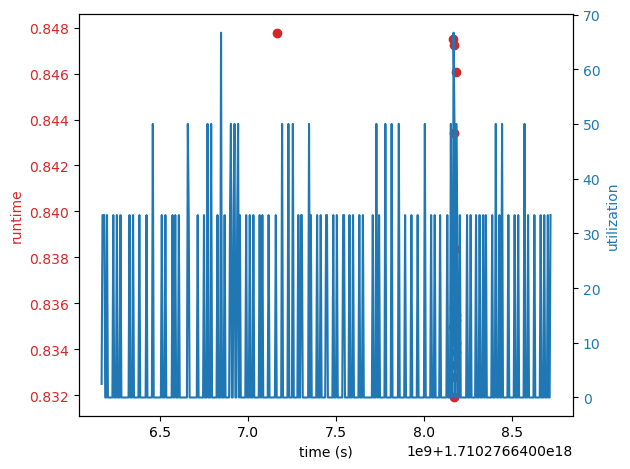

In [27]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('runtime', color=color)
ax1.scatter(workers["time"], workers["runtime"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('utilization', color=color)  # we already handled the x-label with ax1
ax2.plot(polling_info["time"], polling_info["util"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [15]:
workers.sort_values('time')

,time,size,theadNum,runtime
0,1710274883233169627,50,-1,0.854715
1,1710274884233288366,50,0,0.854674
2,1710274884234203179,50,1,0.837258
3,1710274884235084332,50,2,0.834267
4,1710274884235963362,50,3,0.833253
5,1710274884236847680,50,4,0.843083
6,1710274884237738667,50,5,0.834471
7,1710274884238623820,50,6,0.836552
8,1710274884239500089,50,7,0.834034
9,1710274884240378312,50,8,0.836240


In [31]:
# workers["diffToExpected"] = mat_sz_rt["rtwoCall"].where(mat_sz_rt["size"] == workers["matsz"])
procs = workers.merge(mat_sz_rt, on='size', how='left')
procs["timeOverExpected"] = procs["runtime"] - procs["rtwoCall"]
procs["percentageOverExpected"] = (procs["timeOverExpected"] / procs["rtwoCall"]) * 100

procs = procs[["time", "size", "percentageOverExpected"]]

In [ ]:
# distribution of runtimes


In [31]:
thread_wait_time = 75

min_runtime = workers["runtime"].where(workers["theadNum"] == -1).dropna()[0]
min_runtime


314.422

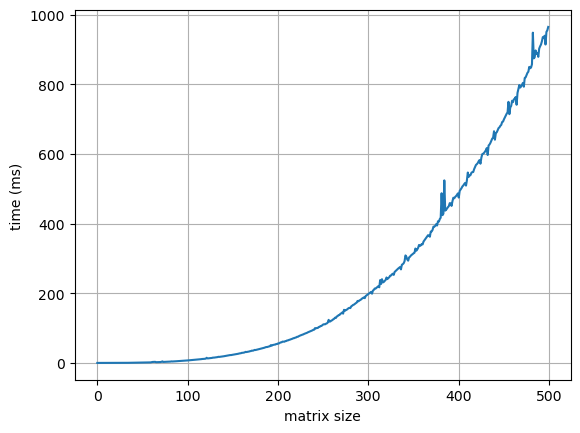

In [9]:
plt.plot(mat_sz_rt["size"], mat_sz_rt["rtwoCall"])
plt.xlabel("matrix size")
plt.ylabel("time (ms)")
plt.grid()
plt.show()